# Simple Harmonic Oscillators (part 2.)

## Coupled Oscillators

Now consider a situation where you have two equal masses connected to two fixed surfaces by springs with a constant $k_1=18Nm^{-1}$. However they are also coupled to each other by a spring of constant $k_2$. As shown below.

![image](images/SHM_coupled.svg)



If the surface is now **frictionless** (again) their equations of motion then become:

$$\begin{aligned}
m\frac{d^2x_1}{dt^2} &= -x_1*k_1+(x_2-x_1)k_2 \\
m\frac{d^2x_2}{dt^2} &= -x_2*k_1+(x_1-x_2)k_2 \\
\end{aligned}$$

**Rearrange these into a set of four first differential equations.**

hello world?


**Write a simulation of this situation. I suggest that you start with $k_2$ being a lot smaller than $k_1$. Start the simulation with just one of the masses displaced from its equilibrium situation by 10cm and everything else is at rest. What is happening to the energy here? Save your plots for your presentation**

   x1 values        v1 values        x2 values        v2 values    
[[ 1.00000000e-01  0.00000000e+00  1.00000000e-01  0.00000000e+00]
 [ 9.99999998e-02 -3.60000360e-05  1.00000000e-01 -2.00000239e-07]
 [ 9.99999993e-02 -7.20000718e-05  1.00000000e-01 -4.00000605e-07]
 ...
 [ 5.31763130e-02 -1.71042366e-01 -3.90453635e-01 -5.83925661e+00]
 [ 5.31746025e-02 -1.71062397e-01 -3.90512026e-01 -5.83909611e+00]
 [ 5.31728917e-02 -1.71082427e-01 -3.90570417e-01 -5.83893560e+00]]


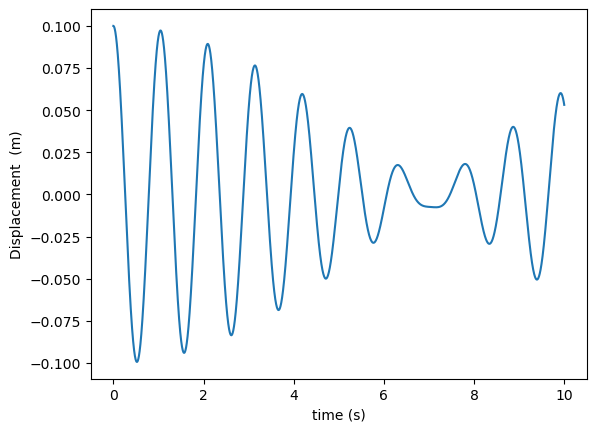

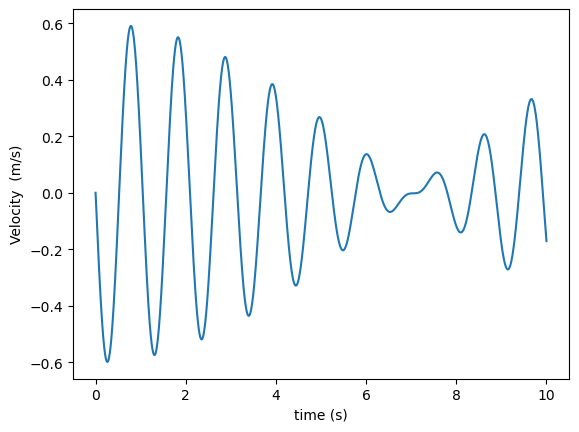

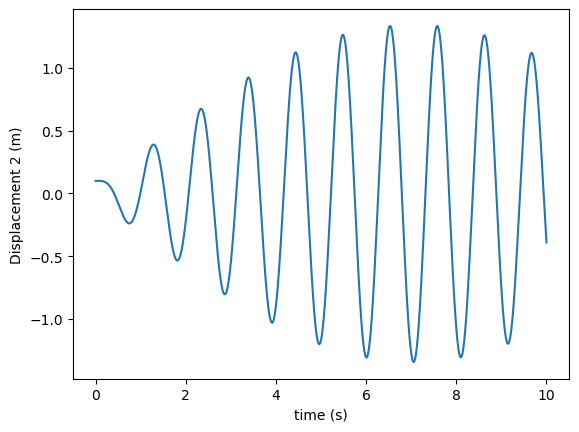

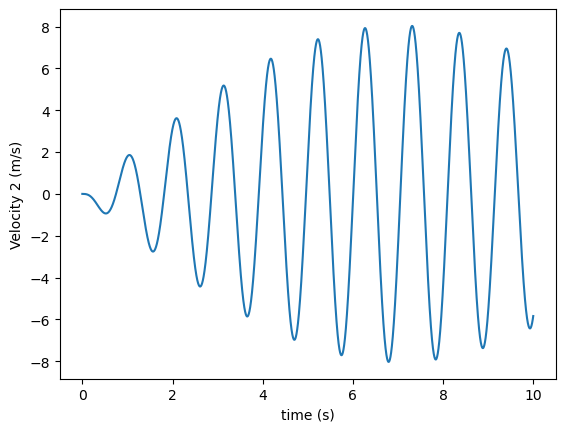

In [4]:
import scipy as sp
import numpy as np
import pylab as pl
import scipy.integrate as spi

k1 = 18  # in Nm^-1
k2 = 0.1
m = 0.5  # in kg

w1 = (k1/m)**0.5
w2 = (k2/m)**0.5


# Note for later: Run simulation for 10 seconds

def f(values_at_t, t):
    x1 = values_at_t[0]
    v1 = values_at_t[1]
    
    x2 = values_at_t[2]
    v2 = values_at_t[3]

    a1 = -x1 * (w1**2) + (x2 - x1) * (w2**2)
    a2 = -x2 * (w2**2) + (x1 - x2) * (w1**2)
    return [v1,a1,v2,a2]
#returns differentiated values

t=np.linspace(0.,10.,10**6) # solving every tenth of a second - more than is needed. You could have used arange here but try looking uplinspace.

# set initial conditions going up at 50 ms^-1 starting at ground level
values_at_0 = [0.1, 0, 0.1, 0]


soln=spi.odeint(f,values_at_0, t) # function name, initial conditions and timesteps

print("   x1 values   ", "    v1 values    ", "   x2 values   ", "    v2 values    ")
print(soln)

x1_all=soln[:,0]
v1_all=soln[:,1]
x2_all=soln[:,2]
v2_all=soln[:,3]


pl.figure(0)
pl.plot(t,x1_all)
pl.xlabel("time (s)")
pl.ylabel("Displacement  (m)")

pl.figure(1)
pl.plot(t,v1_all)
pl.xlabel("time (s)")
pl.ylabel("Velocity  (m/s)")

pl.figure(2)
pl.plot(t,x2_all)
pl.xlabel("time (s)")
pl.ylabel("Displacement 2 (m)")

pl.figure(3)
pl.plot(t,v2_all)
pl.xlabel("time (s)")
pl.ylabel("Velocity 2 (m/s)")

pl.show()

   x1 values        v1 values        x2 values        v2 values    
[[ 1.00000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.99999815e-02 -3.70000328e-04  5.00000877e-10  1.00000077e-05]
 [ 9.99999260e-02 -7.40000522e-04  2.00000313e-09  2.00000082e-05]
 ...
 [-1.13224315e-02 -2.09335213e-01 -8.85748299e-02  1.82100620e-01]
 [-1.13433634e-02 -2.09302138e-01 -8.85566034e-02  1.82427181e-01]
 [-1.13642920e-02 -2.09268983e-01 -8.85383444e-02  1.82753671e-01]]


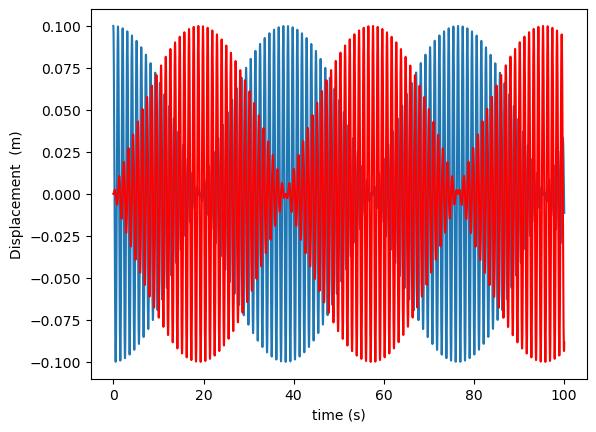

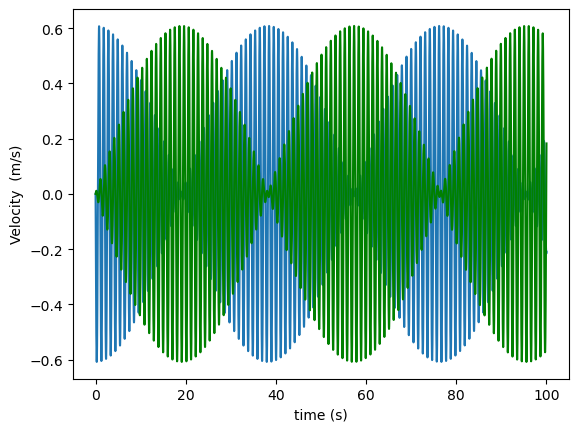

In [17]:

import scipy as sp
import numpy as np
import pylab as pl
import scipy.integrate as spi

k1 = 18  # in Nm^-1
k2 = 0.5
m = 0.5  # in kg

w1 = (k1/m)**0.5
w2 = (k2/m)**0.5


# Note for later: Run simulation for 10 seconds

def f(values_at_t, t):
    x1 = values_at_t[0]
    v1 = values_at_t[1]
    
    x2 = values_at_t[2]
    v2 = values_at_t[3]

    a1 = -x1 * (w1**2) + (x2 - x1) * (w2**2)
    a2 = -x2 * (w1**2) + (x1 - x2) * (w2**2)
    return [v1,a1,v2,a2]
#returns differentiated values

t=np.linspace(0.,100.,10**6) # solving every tenth of a second - more than is needed. You could have used arange here but try looking uplinspace.

# set initial conditions going up at 50 ms^-1 starting at ground level
values_at_0 = [0.1, 0, 0, 0]


soln=spi.odeint(f,values_at_0, t) # function name, initial conditions and timesteps

print("   x1 values   ", "    v1 values    ", "   x2 values   ", "    v2 values    ")
print(soln)

x1_all=soln[:,0]
v1_all=soln[:,1]
x2_all=soln[:,2]
v2_all=soln[:,3]
pl.figure(0)
pl.plot(t,x1_all)
pl.plot(t,x2_all,"r")
pl.xlabel("time (s)")
pl.ylabel("Displacement  (m)")

pl.figure(1)
pl.plot(t,v1_all)
pl.plot(t,v2_all,"g")
pl.xlabel("time (s)")
pl.ylabel("Velocity  (m/s)")

pl.show()

## Forced Damped Oscillators
Now reconsider the **damped oscillator** simulation from yesterday. This time, instead of being attached to a fixed wall, the end of the spring not attached to the mass is instead attached to a moving oscillator that is oscillating with an amplitude of 5cm and a frequency $\Omega$

![SHM forced](images/SHM_forced.svg)</br>

**Incorporate this into your simulation. Now start with with you mass at rest at the unextended length of the spring. Investigate the motion of the mass for different values of $\Omega$. You might want to especially consider both the situation where the damping is light (ie b is quite small) and where damping is very heavy (ie b is very large). You should run you simulation for more than 10s (perhaps 100s is better here but do investigate how the mass goes from stationary to its final motion). Take care to look at the amplitude of the motion Keep your plots they will be useful in your presentations tomorrow.** 

   x values        v values    
[[ 1.00000000e-01  0.00000000e+00]
 [ 1.00000007e-01  1.39998670e-04]
 [ 1.00000028e-01  2.79994313e-04]
 ...
 [ 1.89061020e-01 -2.49731246e+01]
 [ 1.86563671e-01 -2.49738008e+01]
 [ 1.84066255e-01 -2.49744679e+01]]
The maximum amplitude is: 4.166469479422046


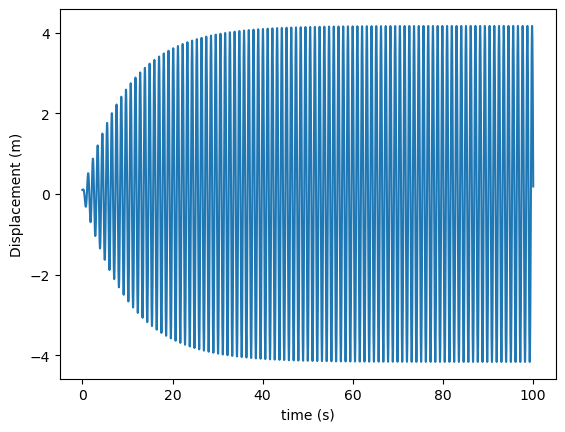

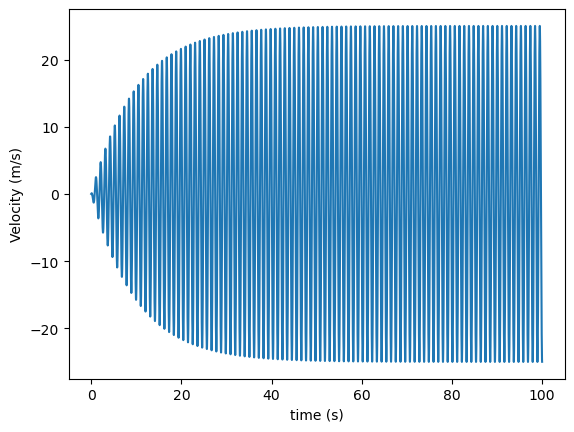

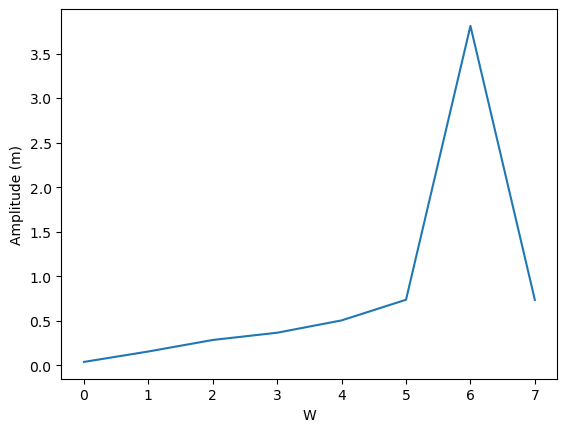

In [106]:
import scipy as sp
import numpy as np
import pylab as pl
import scipy.integrate as spi

k = 18  # in Nm^-1
m = 0.5  # in kg
x0 = 0.1  #  starting displacement, in metres
F0 = 5
c = 0.1
w = (k/m)**0.5
gamma = c/m
W=6

# Note for later: Run simulation for 10 seconds

def f(values_at_t, t):
  x = values_at_t[0]
  v = values_at_t[1]
  
  a = (F0 * np.cos(W * t) - gamma * v - w**2 * x)
  return [v,a]
#returns differentiated values


t=np.linspace(0.,100.,10**6) # solving every tenth of a second - more than is needed. You could have used arange here but try looking uplinspace.

# set initial conditions going up at 50 ms^-1 starting at ground level
values_at_0 = [x0, 0]

W = 0
xAfter = 0
xBefore = -1
Warray = []
ampArray = []

while xAfter > xBefore:
    soln=spi.odeint(f,values_at_0, np.linspace(175,200.,10**6)) # function name, initial conditions and timesteps

    x_all=soln[:,0]
    v_all=soln[:,1]
    
    amplitude= (np.max(x_all)-np.min(x_all))/2
   
    xBefore = xAfter
    xAfter = amplitude
    
    Warray.append(W)
    ampArray.append(amplitude)
    
    W += 1
    
W = W - 2

soln=spi.odeint(f,values_at_0, t) # function name, initial conditions and timesteps
    
print("   x values   ", "    v values    ")
print(soln)

x_all=soln[:,0]
v_all=soln[:,1]

amplitude= (np.max(x_all)-np.min(x_all))/2

print("The maximum amplitude is:", amplitude)

pl.figure(0)
pl.plot(t,x_all)
pl.xlabel("time (s)")
pl.ylabel("Displacement (m)")

pl.figure(1)
pl.plot(t,v_all)
pl.xlabel("time (s)")
pl.ylabel("Velocity (m/s)")

pl.figure(2)
pl.plot(Warray, ampArray)
pl.xlabel("W")
pl.ylabel("Amplitude (m)")


pl.show()

**As the driving frequence $\Omega$ approaches the natural frequency $\omega$ of the system, the amplitude of the steady state should be maximal. This phenomena is known as resonence. Try now to investigate this effect by repeating your simulation with different driving frequencies. How does the steady state amplitude respond?**

---

---

## Adding oscillations and Fourier Transforms (Optional)

Often nature presents us with a sum of waves from different oscillators and often these are simply added togtether. These sums of sinusoids often give us interesting patterns from which we can determine the underlying structure. One such example is in the science of interferometry (try googling Michelson interferometer). Light sourcces are often made of individual lines with a fixed wavlengths and with a Michelson Interferometer, through very tiny movements of a mirror we are able to see the individual peaks and trough of light waves. When we have two  lines very close to each we see a superposition of the two waves.

**Simply by adding two sinusoides together show the pattern that you would see if you had a light source with two lines. One with a wavelength of of 560nm and another with a wavlength 562nm**


**Look up how to perform a (fast) fourier transform with SciPy and do this on your data. What does it show you?**